In [2]:

import numpy as np
import pickle as p
import matplotlib.pyplot as plt
import cooler
import glob

In [3]:
gbm_screen = np.load('/cluster/home/futing/Project/GBM/Corigami/result/gbm/screening/npy/chr1_screen_61637331_63640275_width_1000_step_1000_diff.npy')

In [ ]:
def main():
    parser = argparse.ArgumentParser(description='Comparing SV-induced')
    
    # Output location
    parser.add_argument('--out', dest='output_path', 
                        default='outputs',
                        help='output path for storing results (default: %(default)s)')

    # Location related params
    parser.add_argument('--sample', dest='sample', 
                        help='Chromosome for prediction', required=True)
    parser.add_argument('--chr', dest='chr_name', 
                        help='Chromosome for prediction', required=True)
    parser.add_argument('--start', dest='start', type=int,
                        help='Starting point for prediction (width is 2097152 bp which is the input window size)', required=True)

    args = parser.parse_args(args=None if sys.argv[1:] else ['--help'])
    gbm_path = glob.glob(f"{args.sample}/gbm/prediction/npy/{args.chr_name}_{args.start}*")
    npc_path = glob.glob(f"{args.sample}/gbm/deletion/npy/{args.chr_name}_{args.start}*")

In [16]:
import glob
from scipy.stats import pearsonr
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
sample='DO10900'
chr_name='chr1'
start=7472417
gbm_path = glob.glob(f"result/{sample}/gbm/prediction/npy/{chr_name}_{start}*")
npc_path = glob.glob(f"result/{sample}/npc/deletion/npy/{chr_name}_{start}*")
print(gbm_path,'\n',npc_path)

['result/DO10900/gbm/prediction/npy/chr1_7472417.npy'] 
 ['result/DO10900/npc/deletion/npy/chr1_7472417_del_8472417_130348_padding_zero.npy']


In [17]:
gbm = np.load(gbm_path[0])
npc = np.load(npc_path[0])

In [20]:
distances = cdist(gbm, npc, 'euclidean')
distances

array([[ 2.99781368,  3.14840208,  3.85700953, ..., 27.82542179,
        26.38694205, 26.19558682],
       [ 3.67962133,  3.64078951,  4.15834473, ..., 28.59491802,
        27.14751427, 26.95285788],
       [ 4.08769333,  3.85048114,  4.00719514, ..., 28.68248935,
        27.24298356, 27.05178395],
       ...,
       [30.37033276, 30.48752867, 30.70075944, ..., 29.51089811,
        27.62216858, 26.96072169],
       [30.03995587, 30.155684  , 30.36978831, ..., 29.23710834,
        27.32012075, 26.65113113],
       [29.56993017, 29.68634005, 29.88897596, ..., 28.21074631,
        26.2928994 , 25.61602107]])

In [21]:
similarity = cosine_similarity(gbm, npc)
similarity

array([[ 0.99466103,  0.99366844,  0.98986393, ..., -0.68619436,
        -0.40780553, -0.29401448],
       [ 0.99358886,  0.9934767 ,  0.9906876 , ..., -0.68831766,
        -0.40637758, -0.29149747],
       [ 0.9914426 ,  0.9925974 ,  0.9920799 , ..., -0.68603295,
        -0.40673104, -0.29335988],
       ...,
       [ 0.3107251 ,  0.30762908,  0.2946362 , ..., -0.5086894 ,
         0.05302299,  0.33040008],
       [ 0.31744197,  0.3144265 ,  0.30138943, ..., -0.5097453 ,
         0.06400015,  0.3435865 ],
       [ 0.30853257,  0.30554298,  0.2925949 , ..., -0.50457394,
         0.07092846,  0.3532456 ]], dtype=float32)

In [23]:
corr_coefficients = np.array([pearsonr(gbm[i], npc[i])[0] for i in range(gbm.shape[0])])
corr_coefficients.shape

(256,)

(256, 256)


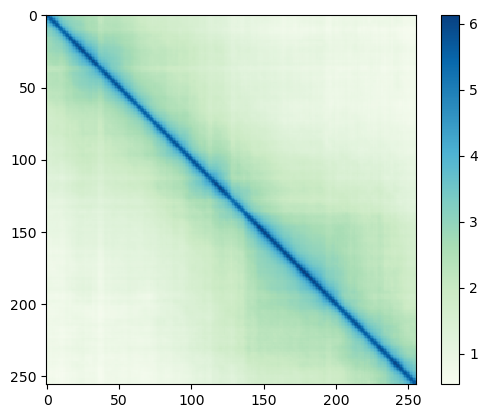

In [13]:
npc_del = np.load('/cluster/home/futing/Project/GBM/Corigami/npc/deletion/npy/chr1_61637331_del_62637331_2944_padding_zero.npy')
print(npc_del.shape)
plt.imshow(npc_del, cmap='GnBu', interpolation='nearest')
plt.colorbar()  # 显示颜色条
plt.show()      # 显示图形

In [4]:
gbm_screen=np.load('/cluster/home/futing/Project/GBM/Corigami/gbm/screening/npy/chr1_screen_61637331_63640275_width_1000_step_1000_diff.npy')
gbm_screen.shape

(2002, 256, 256)

In [12]:
npc_pre = np.load('/cluster/home/futing/Project/GBM/Corigami/npc/prediction/npy/chr1_62637331.npy')

In [14]:
dif = log(npc_pre/npc_del)

NameError: name 'log2' is not defined

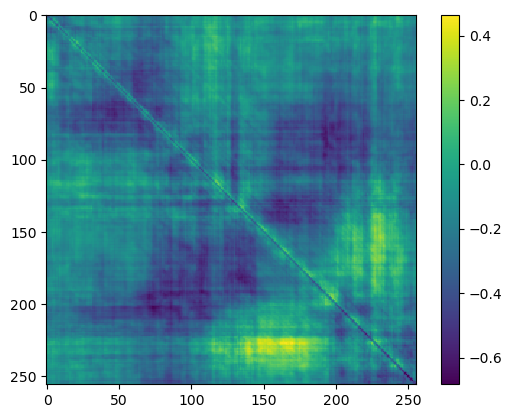

In [9]:
plt.imshow(dif, cmap='viridis', interpolation='nearest')
plt.colorbar()  # 显示颜色条
plt.show()      # 显示图形

In [2]:
c = cooler.Cooler('/cluster/home/futing/Project/GBM/Corigami/cool_predict_new/predicted_cooler_no_ref_lft.cool')

In [6]:
c.bins()[:]

,chrom,start,end
0,chr1,0,10000
1,chr1,10000,20000
2,chr1,20000,30000
3,chr1,30000,40000
4,chr1,40000,50000
...,...,...,...
287504,chr22,50770000,50780000
287505,chr22,50780000,50790000
287506,chr22,50790000,50800000
287507,chr22,50800000,50810000
